In [ ]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import re

### **File upload**

In [ ]:
# Assuming your CSV file has columns: date_time, tweet_id, text, username
def load_csv_data(file_path):
    text = pd.read_csv(file_path)
    return text

# Example usage
file_path = '/content/drive/MyDrive/Colab Notebooks/DAIGT.csv'  # Replace 'tweets.csv' with your actual file path
text = load_csv_data(file_path)

# Display the first few rows of the DataFrame
print(text.head())

                                                text  labels
0  Regular inactive times are integral to our ove...       1
1  One famous quote by Michelangelo that relates ...       1
2  Attending online classes or video conferencing...       1
3  Making your own decisions in life has many adv...       1
4  Dear Principle,\n\nchanging the policy is a go...       0


In [ ]:
# Count the total number of augmented records
total_records = len(text)

# Display the total number of augmented records
print(f'Total records: {total_records}')


Total records: 4842


In [ ]:
pip uninstall torch


Found existing installation: torch 2.4.0+cu121
Uninstalling torch-2.4.0+cu121:
  Would remove:
    /usr/local/bin/convert-caffe2-to-onnx
    /usr/local/bin/convert-onnx-to-caffe2
    /usr/local/bin/torchrun
    /usr/local/lib/python3.10/dist-packages/functorch/*
    /usr/local/lib/python3.10/dist-packages/torch-2.4.0+cu121.dist-info/*
    /usr/local/lib/python3.10/dist-packages/torch/*
    /usr/local/lib/python3.10/dist-packages/torchgen/*
Proceed (Y/n)? y
Y
  Successfully uninstalled torch-2.4.0+cu121


In [ ]:
pip install torch torchvision torchaudio


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 797.2/797.2 MB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 53.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 41.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 38.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 14.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.2/176.2 MB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 

In [ ]:
!pip install nlpaug

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.5/410.5 kB 8.5 MB/s eta 0:00:00


In [ ]:
import re
import string
import spacy
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [ ]:
# Download required NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
# Load SpaCy model
nlp = spacy.load('en_core_web_sm')

In [ ]:
# Check for missing values in the 'text' column
missing_values = text['text'].isnull().sum()

print(f"Number of missing values in 'text' column: {missing_values}")

Number of missing values in 'text' column: 0


In [ ]:
# Drop rows with missing values in the 'text' column
text.dropna(subset=['text'], inplace=True)

# Display the DataFrame after removing missing values
print(text)

                                                   text  labels
0     Regular inactive times are integral to our ove...       1
1     One famous quote by Michelangelo that relates ...       1
2     Attending online classes or video conferencing...       1
3     Making your own decisions in life has many adv...       1
4     Dear Principle,\n\nchanging the policy is a go...       0
...                                                 ...     ...
4837  Singing has long been known to bring joy to th...       1
4838  I agree with Thomas Jefferson quote,"Determine...       0
4839  Changing the school menu can be a controversia...       1
4840  We have the power to choose our own character ...       1
4841  Do you think that school students should have ...       0

[4842 rows x 2 columns]


In [ ]:
# Check for missing values in the 'text' column
missing_values = text['text'].isnull().sum()

print(f"Number of missing values in 'text' column: {missing_values}")

Number of missing values in 'text' column: 0


# Text **Preprocessing**

In [ ]:
# Initialize NLTK stemmer and lemmatizer
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

# Function for text cleaning
def clean_text(text):
    # Lowercasing
    text = text.lower()

    # Removing URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)

    # Removing Email addresses
    text = re.sub(r'\S*@\S*\s?', '', text)

    # Removing HTML tags
    text = re.sub(r'<.*?>', '', text)

    # Removing special characters and digits
    text = re.sub(r'[^a-zA-Z\s]', '', text)

    # Removing punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Tokenization
    words = word_tokenize(text)

    # Removing stop words
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]

    # Stemming
    words = [stemmer.stem(word) for word in words]

    # Lemmatization
    words = [lemmatizer.lemmatize(word) for word in words]

    return ' '.join(words)


df = pd.DataFrame(text)

# Apply clean_text function to the 'text' column
df['cleaned_text'] = df['text'].apply(clean_text)

In [ ]:
print(df['cleaned_text'])

0       regular inact time integr overal health wellb ...
1       one famou quot michelangelo relat challeng set...
2       attend onlin class video conferenc home versu ...
3       make decis life mani advantag take respons dec...
4       dear principl chang polici good idea mani peop...
                              ...                        
4837    sing long known bring joy partak mani peopl fo...
4838    agre thoma jefferson quotedetermin never idlei...
4839    chang school menu controversi topic posit neg ...
4840    power choos charact trait give u abil decid so...
4841    think school student least particip one extrac...
Name: cleaned_text, Length: 4842, dtype: object


# **EDA on Dataset**

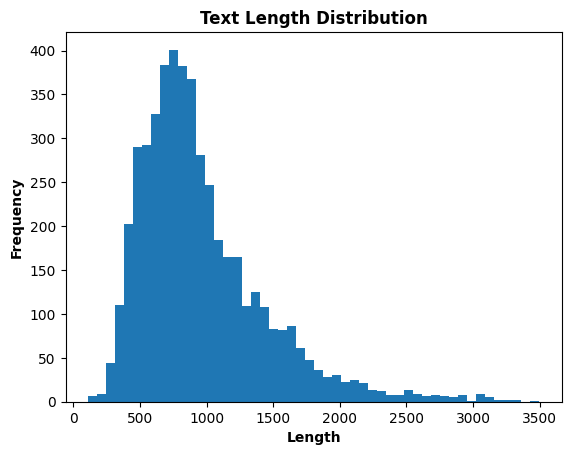

In [ ]:
import matplotlib.pyplot as plt

df['text_length'] = df['cleaned_text'].apply(len)
plt.hist(df['text_length'], bins=50)
plt.title('Text Length Distribution',fontweight='bold')
plt.xlabel('Length',fontweight='bold')
plt.ylabel('Frequency',fontweight='bold')
plt.show()


labels
1    2421
0    2421
Name: count, dtype: int64


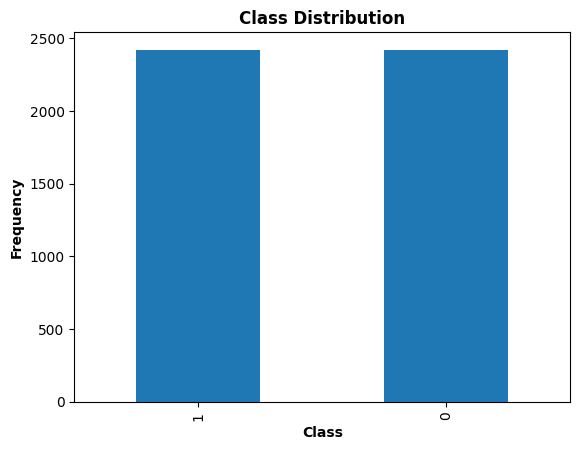

In [ ]:
# Check class distribution
label_counts = df['labels'].value_counts()
print(label_counts)
# Plot class distribution
label_counts.plot(kind='bar')
plt.title('Class Distribution',fontweight='bold')
plt.xlabel('Class',fontweight='bold')
plt.ylabel('Frequency',fontweight='bold')
plt.show()

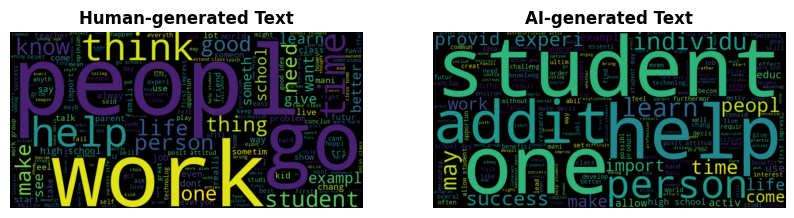

In [ ]:
from wordcloud import WordCloud

human_text = ' '.join(df[df['labels'] == 0]['cleaned_text'])
ai_text = ' '.join(df[df['labels'] == 1]['cleaned_text'])

human_wordcloud = WordCloud(width=800, height=400).generate(human_text)
ai_wordcloud = WordCloud(width=800, height=400).generate(ai_text)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(human_wordcloud, interpolation='bilinear')
plt.title('Human-generated Text',fontweight='bold')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(ai_wordcloud, interpolation='bilinear')
plt.title('AI-generated Text',fontweight='bold')
plt.axis('off')

plt.show()


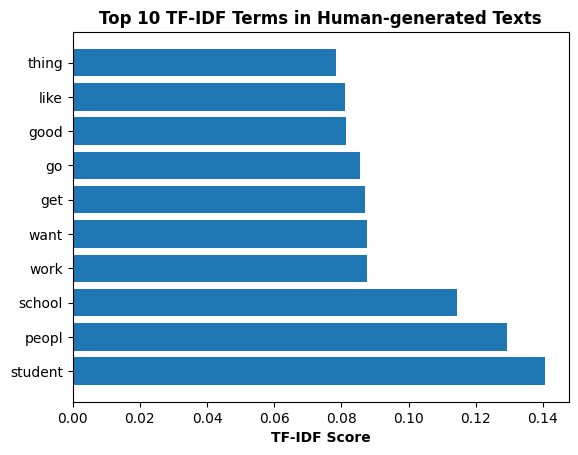

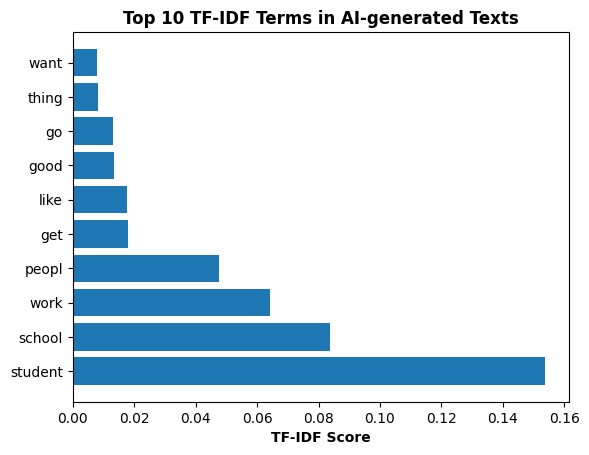

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
tfidf = TfidfVectorizer(max_features=100)
tfidf_matrix = tfidf.fit_transform(df['cleaned_text'])
feature_names = tfidf.get_feature_names_out()

human_tfidf = tfidf_matrix[df['labels'] == 0].mean(axis=0).A1
ai_tfidf = tfidf_matrix[df['labels'] == 1].mean(axis=0).A1

tfidf_df = pd.DataFrame({'term': feature_names, 'human_tfidf': human_tfidf, 'ai_tfidf': ai_tfidf})
tfidf_df = tfidf_df.sort_values(by='human_tfidf', ascending=False).head(10)

plt.barh(tfidf_df['term'], tfidf_df['human_tfidf'])
plt.xlabel('TF-IDF Score',fontweight='bold')
plt.title('Top 10 TF-IDF Terms in Human-generated Texts',fontweight='bold')
plt.show()

tfidf_df = tfidf_df.sort_values(by='ai_tfidf', ascending=False).head(10)

plt.barh(tfidf_df['term'], tfidf_df['ai_tfidf'])
plt.xlabel('TF-IDF Score',fontweight='bold')
plt.title('Top 10 TF-IDF Terms in AI-generated Texts',fontweight='bold')
plt.show()


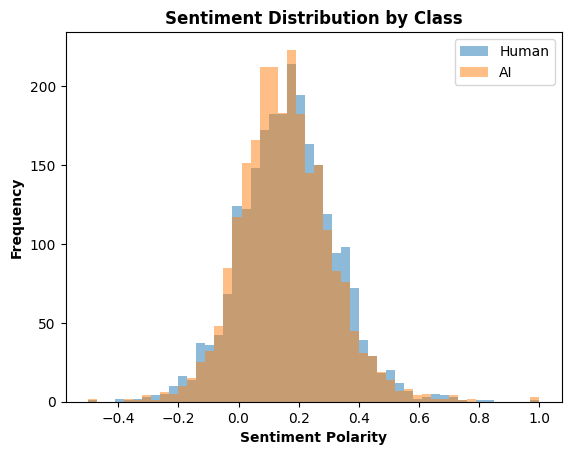

In [ ]:
from textblob import TextBlob

df['sentiment'] = df['cleaned_text'].apply(lambda x: TextBlob(x).sentiment.polarity)
plt.hist(df[df['labels'] == 0]['sentiment'], bins=50, alpha=0.5, label='Human')
plt.hist(df[df['labels'] == 1]['sentiment'], bins=50, alpha=0.5, label='AI')
plt.legend(loc='upper right')
plt.title('Sentiment Distribution by Class',fontweight='bold')
plt.xlabel('Sentiment Polarity',fontweight='bold')
plt.ylabel('Frequency',fontweight='bold')
plt.show()


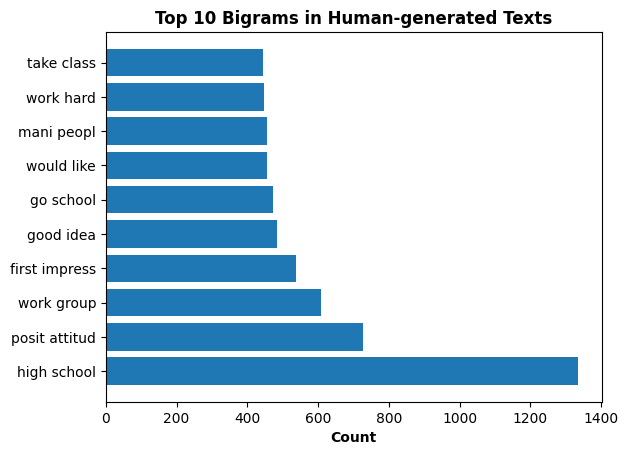

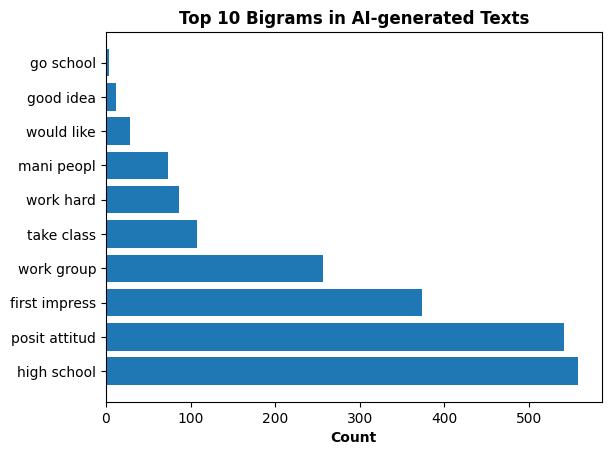

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

ngram_vectorizer = CountVectorizer(ngram_range=(2, 2), max_features=100)
ngram_matrix = ngram_vectorizer.fit_transform(df['cleaned_text'])
ngram_feature_names = ngram_vectorizer.get_feature_names_out()

human_ngrams = ngram_matrix[df['labels'] == 0].sum(axis=0).A1
ai_ngrams = ngram_matrix[df['labels'] == 1].sum(axis=0).A1

ngram_df = pd.DataFrame({'ngram': ngram_feature_names, 'human_count': human_ngrams, 'ai_count': ai_ngrams})
ngram_df = ngram_df.sort_values(by='human_count', ascending=False).head(10)

plt.barh(ngram_df['ngram'], ngram_df['human_count'])
plt.xlabel('Count',fontweight='bold')
plt.title('Top 10 Bigrams in Human-generated Texts',fontweight='bold')
plt.show()

ngram_df = ngram_df.sort_values(by='ai_count', ascending=False).head(10)

plt.barh(ngram_df['ngram'], ngram_df['ai_count'])
plt.xlabel('Count',fontweight='bold')
plt.title('Top 10 Bigrams in AI-generated Texts',fontweight='bold')
plt.show()


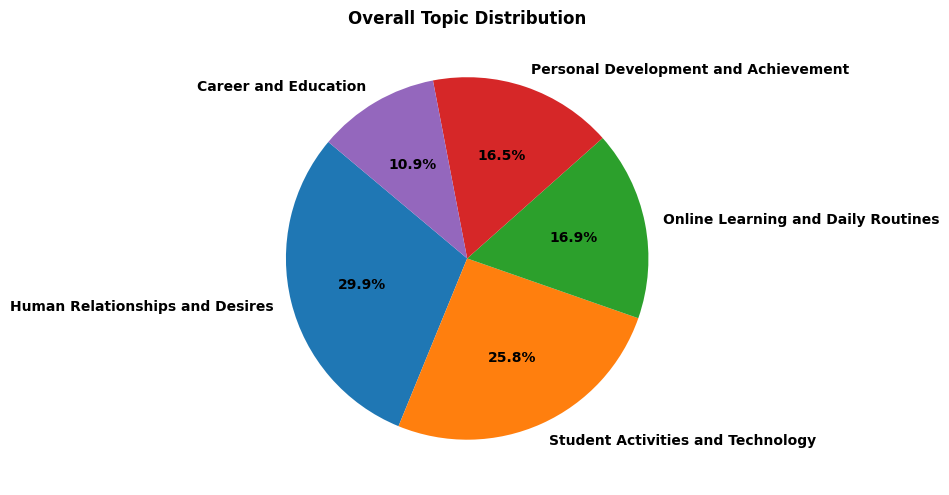

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import TfidfVectorizer

# Assuming df['cleaned_text'] contains preprocessed text data

# Vectorize text data using TF-IDF
vectorizer = TfidfVectorizer(max_features=1000, max_df=0.95, min_df=2, stop_words='english')
tfidf_matrix = vectorizer.fit_transform(df['cleaned_text'])

# Fit LDA model
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda_matrix = lda.fit_transform(tfidf_matrix)

# Assign topics to each document
df['topic'] = lda_matrix.argmax(axis=1)

# Define meaningful topic names
topic_names = {
    0: "Personal Development and Achievement",
    1: "Human Relationships and Desires",
    2: "Student Activities and Technology",
    3: "Career and Education",
    4: "Online Learning and Daily Routines"
}

# Map topic indices to topic names
df['topic_name'] = df['topic'].map(topic_names).fillna("Others")

# Calculate overall topic distribution
overall_topics = df['topic_name'].value_counts()

# Plotting pie chart for overall topic distribution
plt.figure(figsize=(8, 6))
plt.pie(overall_topics, labels=overall_topics.index, autopct='%1.1f%%', startangle=140,textprops={'fontweight': 'bold'})
plt.title('Overall Topic Distribution',fontweight='bold')
plt.tight_layout()
plt.show()


In [ ]:
import numpy as np

# Get feature names (words) from TfidfVectorizer
feature_names = vectorizer.get_feature_names_out()

# Print top words for each topic
n_top_words = 10
for topic_idx, topic in enumerate(lda.components_):
    print(f"Topic {topic_idx + 1}:")
    print(" ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]))
    print()


Topic 1:
success failur attitud posit goal achiev life curfew import challeng

Topic 2:
peopl life thing impress want good like person make someth

Topic 3:
student provid activ technolog work decis potenti addit help skill

Topic 4:
student career school work high class group help young want

Topic 5:
student school class onlin time hour home phone day technolog



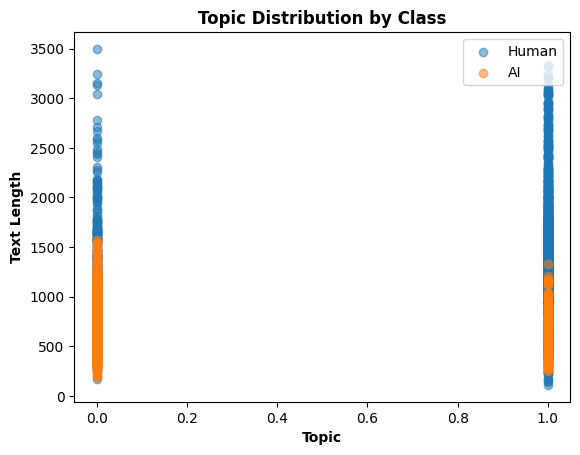

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation

lda = LatentDirichletAllocation(n_components=2, random_state=42)
lda_matrix = lda.fit_transform(tfidf_matrix)

df['topic'] = lda_matrix.argmax(axis=1)
plt.scatter(df[df['labels'] == 0]['topic'], df[df['labels'] == 0]['text_length'], alpha=0.5, label='Human')
plt.scatter(df[df['labels'] == 1]['topic'], df[df['labels'] == 1]['text_length'], alpha=0.5, label='AI')
plt.legend(loc='upper right')
plt.title('Topic Distribution by Class',fontweight='bold')
plt.xlabel('Topic',fontweight='bold')
plt.ylabel('Text Length',fontweight='bold')
plt.show()


In [ ]:
!pip install textstat

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.1/105.1 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 39.7 MB/s eta 0:00:00


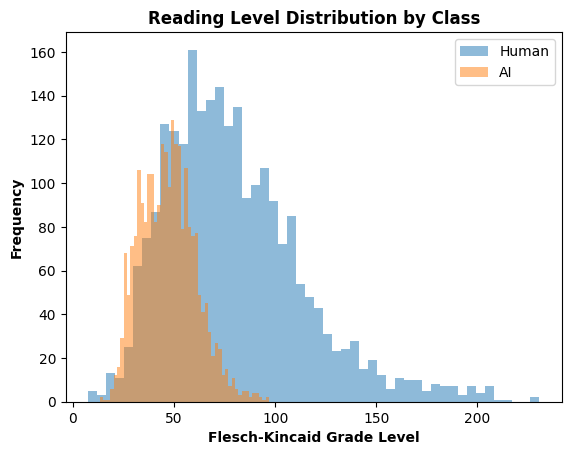

In [ ]:
from textstat import textstat

df['reading_level'] = df['cleaned_text'].apply(textstat.flesch_kincaid_grade)

plt.hist(df[df['labels'] == 0]['reading_level'], bins=50, alpha=0.5, label='Human')
plt.hist(df[df['labels'] == 1]['reading_level'], bins=50, alpha=0.5, label='AI')
plt.legend(loc='upper right')
plt.title('Reading Level Distribution by Class',fontweight='bold')
plt.xlabel('Flesch-Kincaid Grade Level',fontweight='bold')
plt.ylabel('Frequency',fontweight='bold')
plt.show()


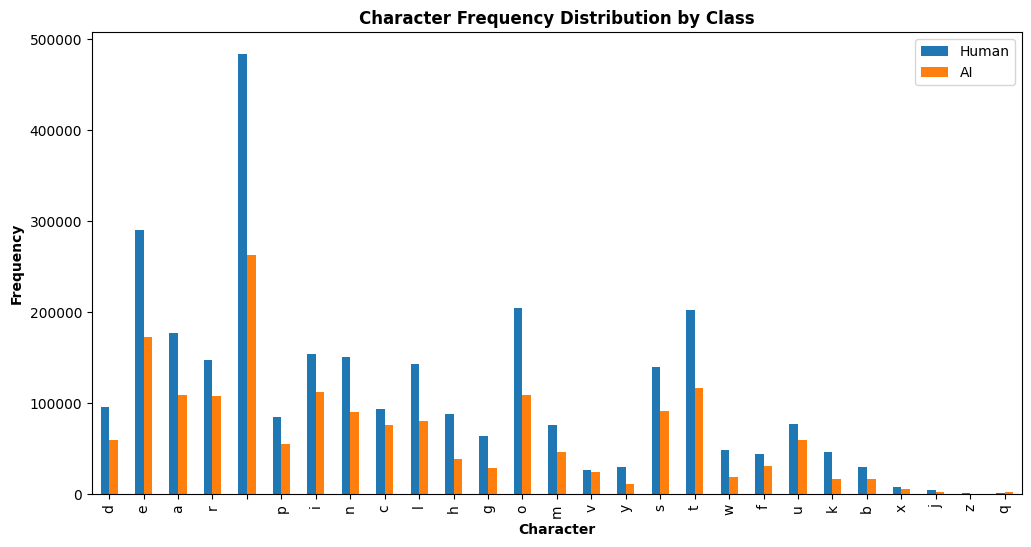

In [ ]:
from collections import Counter

human_chars = Counter(''.join(df[df['labels'] == 0]['cleaned_text']))
ai_chars = Counter(''.join(df[df['labels'] == 1]['cleaned_text']))

char_df = pd.DataFrame([human_chars, ai_chars]).fillna(0).astype(int).T
char_df.columns = ['Human', 'AI']
char_df.plot(kind='bar', figsize=(12, 6))
plt.title('Character Frequency Distribution by Class',fontweight='bold')
plt.xlabel('Character',fontweight='bold')
plt.ylabel('Frequency',fontweight='bold')
plt.show()


In [ ]:
human_words = set(' '.join(df[df['labels'] == 0]['cleaned_text']).split())
ai_words = set(' '.join(df[df['labels'] == 1]['cleaned_text']).split())

unique_human_words = human_words - ai_words
unique_ai_words = ai_words - human_words

print(f"Unique words in human-generated texts: {list(unique_human_words)[:10]}")
print(f"Unique words in AI-generated texts: {list(unique_ai_words)[:10]}")

Unique words in human-generated texts: ['schedu', 'activitei', 'impresst', 'scient', 'becau', 'moreand', 'adit', 'homejobschool', 'anna', 'helpfult']
Unique words in AI-generated texts: ['rudolph', 'susten', 'badcan', 'unbeliev', 'reef', 'stressreduc', 'fluenci', 'luxuryfashionadvisorcom', 'preach', 'iii']


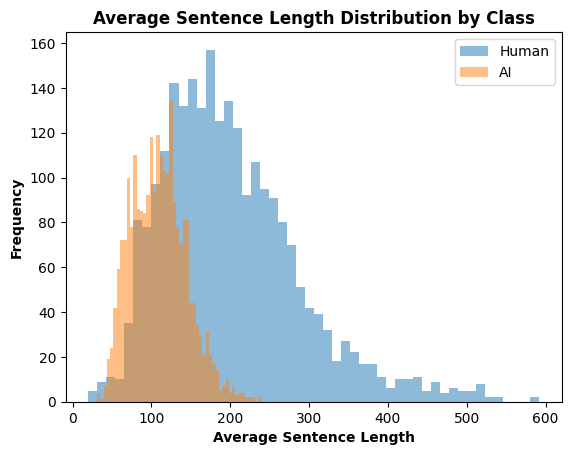

In [ ]:
def get_sentence_lengths(cleaned_text):
    sentences = nltk.sent_tokenize(cleaned_text)
    return [len(nltk.word_tokenize(sentence)) for sentence in sentences]

df['sentence_lengths'] = df['cleaned_text'].apply(get_sentence_lengths)
df['avg_sentence_length'] = df['sentence_lengths'].apply(lambda x: sum(x) / len(x))

plt.hist(df[df['labels'] == 0]['avg_sentence_length'], bins=50, alpha=0.5, label='Human')
plt.hist(df[df['labels'] == 1]['avg_sentence_length'], bins=50, alpha=0.5, label='AI')
plt.legend(loc='upper right')
plt.title('Average Sentence Length Distribution by Class',fontweight='bold')
plt.xlabel('Average Sentence Length',fontweight='bold')
plt.ylabel('Frequency',fontweight='bold')
plt.show()


In [ ]:
!pip install keras


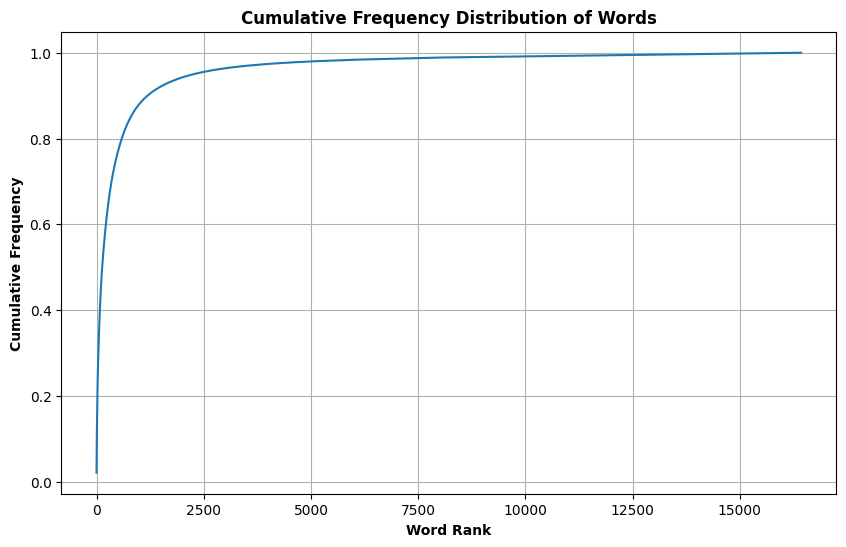

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer


# Create a tokenizer without num_words limit to see all words
full_tokenizer = Tokenizer()
full_tokenizer.fit_on_texts(df['cleaned_text'])

# Get word counts
word_counts = full_tokenizer.word_counts
word_counts = sorted(word_counts.items(), key=lambda x: x[1], reverse=True)
words, counts = zip(*word_counts)

# Cumulative frequency distribution
cumulative_counts = np.cumsum(counts)
cumulative_counts = cumulative_counts / cumulative_counts[-1]

plt.figure(figsize=(10, 6))
plt.plot(cumulative_counts)
plt.title('Cumulative Frequency Distribution of Words',fontweight='bold')
plt.xlabel('Word Rank',fontweight='bold')
plt.ylabel('Cumulative Frequency',fontweight='bold')
plt.grid(True)
plt.show()


In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(num_words=4000)
tokenizer.fit_on_texts(df['cleaned_text'])
X = tokenizer.texts_to_sequences(df['cleaned_text'])


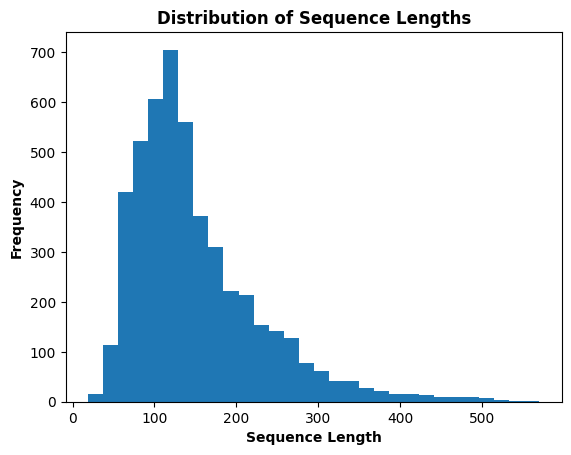

Maximum sequence length: 570


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming X is your list/array of tokenized sequences
sequence_lengths = [len(seq) for seq in X]

# Plotting a histogram of sequence lengths
plt.hist(sequence_lengths, bins=30)
plt.xlabel('Sequence Length',fontweight='bold')
plt.ylabel('Frequency',fontweight='bold')
plt.title('Distribution of Sequence Lengths',fontweight='bold')
plt.show()

# Calculate the maximum sequence length based on your analysis
maxlen = np.max(sequence_lengths)
print(f"Maximum sequence length: {maxlen}")


In [ ]:
from keras.preprocessing.sequence import pad_sequences

maxlen = 500  # Define the max length based on your EDA
X_padded = pad_sequences(X, padding='post', maxlen=maxlen)


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=4000)
X_tfidf = tfidf.fit_transform(df['cleaned_text']).toarray()


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_padded, df['labels'], test_size=0.2, random_state=42)


## **Logistic regression**

In [ ]:
import time
from sklearn.linear_model import LogisticRegression

# Initialize the model
model = LogisticRegression()

# Record start time
start_time = time.time()

# Fit the model
model.fit(X_train, y_train)

# Record end time
end_time = time.time()

# Calculate training time
training_time = end_time - start_time

print(f"Training time: {training_time:.2f} seconds")


Training time: 0.57 seconds


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.metrics import classification_report

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.87      0.63      0.73       492
           1       0.70      0.90      0.79       477

    accuracy                           0.76       969
   macro avg       0.78      0.77      0.76       969
weighted avg       0.79      0.76      0.76       969



# **XGBoost Classifier**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
# Tokenize texts
tfidf_vectorizer = TfidfVectorizer(max_features=4000)
X_tfidf = tfidf_vectorizer.fit_transform(df['cleaned_text']).toarray()
# Initialize XGBoost classifier
model = XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',  # Use 'logloss' for binary classification
    use_label_encoder=False,  # If your labels are already in 0, 1 format
    random_state=42
)

# Measure time for training
start_train_time = time.time()

# Fit the model
model.fit(X_train, y_train)

# Measure time after training
end_train_time = time.time()
training_time = end_train_time - start_train_time

# Measure time for prediction
start_pred_time = time.time()

# Predict on test set
y_pred = model.predict(X_test)

# Measure time after prediction
end_pred_time = time.time()
prediction_time = end_pred_time - start_pred_time

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(classification_report(y_test, y_pred))
print(f'Training time: {training_time:.2f} seconds')
print(f'Prediction time: {prediction_time:.2f} seconds')


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:58:37] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.9029927760577915
              precision    recall  f1-score   support

           0       0.93      0.87      0.90       492
           1       0.88      0.93      0.90       477

    accuracy                           0.90       969
   macro avg       0.90      0.90      0.90       969
weighted avg       0.90      0.90      0.90       969

Training time: 3.82 seconds
Prediction time: 0.01 seconds


# **# MLP classifier**

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Assuming your preprocessed and split data is X_train, X_test, y_train, y_test
input_shape = X_train.shape[1]
# Define MLP model
model = Sequential([
    Dense(128, activation='relu', input_shape=(input_shape,)),  # input_shape_here should be the number of features
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')  # For binary classification, use 'sigmoid'; for multi-class, use 'softmax'
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',  # For binary classification; use 'categorical_crossentropy' for multi-class
              metrics=['accuracy'])

# Print model summary
model.summary()

# Measure training time
start_time = time.time()
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))
end_time = time.time()
training_time = end_time - start_time
print(f'Training time: {training_time:.2f} seconds')

# Evaluate the model
start_time = time.time()
loss, accuracy = model.evaluate(X_test, y_test)
end_time = time.time()
evaluation_time = end_time - start_time
print(f'Accuracy: {accuracy}')
print(f'Evaluation time: {evaluation_time:.2f} seconds')

# Make predictions
start_time = time.time()
y_pred = model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype(int)  # Convert probabilities to binary class labels
end_time = time.time()
prediction_time = end_time - start_time
print(f'Prediction time: {prediction_time:.2f} seconds')

# Calculate precision, recall, f1-score, and support
report = classification_report(y_test, y_pred_classes)
print("Classification Report:")
print(report)



/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │          64,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 72,449 (283.00 KB)

 Trainable params: 72,449 (283.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
122/122 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.6841 - loss: 33.2035 - val_accuracy: 0.7296 - val_loss: 12.1571
Epoch 2/50
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8234 - loss: 6.3562 - val_accuracy: 0.7472 - val_loss: 10.1510
Epoch 3/50
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8664 - loss: 2.5414 - val_accuracy: 0.7472 - val_loss: 9.5029
Epoch 4/50
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9148 - loss: 1.3274 - val_accuracy: 0.7131 - val_loss: 10.0354
Epoch 5/50
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9364 - loss: 0.9046 - val_accuracy: 0.7482 - val_loss: 8.5051
Epoch 6/50
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9631 - loss: 0.4438 - val_accuracy: 0.7430 - val_loss: 8.1063
Epoch 7/50
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9577 - loss: 0.3328 - val_accuracy: 0.7482 - val_loss: 7.9903
Epoch 8/50
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8853 - loss: 2.7754 - val_accurac

In [ ]:
# Save the model
model_save_path = 'F:\my_model.h5'
model.save(model_save_path)
print(f'Model saved to {model_save_path}')

Model saved to F:\my_model.h5


# **Ensemble**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, StackingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier

# Assuming you have preprocessed and split your data
# X_train, X_test, y_train, y_test are your preprocessed features and labels

# Initialize base models
base_models = [
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('nb', MultinomialNB()),
    ('xgb', XGBClassifier(n_estimators=100, random_state=42)),
    ('ada', AdaBoostClassifier(n_estimators=100, random_state=42))
]

# Initialize meta-model
meta_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Initialize stacking classifier
stacking_model = StackingClassifier(estimators=base_models, final_estimator=meta_model)

# Train stacking classifier


# Predictions from stacking model

# Evaluate the model
start_time = time.time()
stacking_model.fit(X_train, y_train)
end_time = time.time()
evaluation_time = end_time - start_time
print(f'Evaluation time: {evaluation_time:.2f} seconds')

# Make predictions
start_time = time.time()
stacking_pred = stacking_model.predict(X_test)
end_time = time.time()
prediction_time = end_time - start_time
print(f'Prediction time: {prediction_time:.2f} seconds')

# Evaluate stacking model
accuracy = accuracy_score(y_test, stacking_pred)
print(f'Stacking Ensemble Model Accuracy: {accuracy:.2f}')
# Calculate precision, recall, and F1-score
report = classification_report(y_test, stacking_pred)
print("Classification Report:")
print(report)


Evaluation time: 73.59 seconds
Prediction time: 0.19 seconds
Stacking Ensemble Model Accuracy: 0.91
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.89      0.91       492
           1       0.89      0.92      0.91       477

    accuracy                           0.91       969
   macro avg       0.91      0.91      0.91       969
weighted avg       0.91      0.91      0.91       969



# **Hybrid CNN and LSTM**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, Conv1D, MaxPooling1D, GlobalMaxPooling1D, LSTM, concatenate, Dense
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.metrics import classification_report

# Define constants
MAX_SEQUENCE_LENGTH = 500  # Maximum sequence length (adjust as needed)
MAX_WORDS = 20000  # Maximum number of words in the vocabulary
EMBEDDING_DIM = 100  # Dimension of word embeddings



# Define hybrid CNN-LSTM model
def hybrid_model(max_sequence_length, max_words, embedding_dim):
    # Input layer for text sequences
    text_input = Input(shape=(max_sequence_length,))

    # Embedding layer
    embedding_layer = Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=max_sequence_length)(text_input)

    # CNN layers
    conv1 = Conv1D(128, 5, activation='relu')(embedding_layer)

    pool3 = GlobalMaxPooling1D()(conv1)

    # LSTM layer
    lstm_out = LSTM(128)(embedding_layer)

    # Concatenate CNN and LSTM outputs
    concatenated = concatenate([pool3, lstm_out])

    # Dense layers
    dense1 = Dense(128, activation='relu')(concatenated)
    output = Dense(1, activation='sigmoid')(dense1)

    # Model definition
    model = Model(inputs=text_input, outputs=output)
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    return model

# Create and compile the hybrid model
model = hybrid_model(MAX_SEQUENCE_LENGTH, MAX_WORDS, EMBEDDING_DIM)

# Print model summary
model.summary()


# Train the model
start_time = time.time()
history=model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))
end_time = time.time()
evaluation_time = end_time - start_time
print(f'Evaluation time: {evaluation_time:.2f} seconds')

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Accuracy: {accuracy:.2f}')
 #Make predictions
start_time = time.time()
y_pred = model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype(int)
end_time = time.time()
prediction_time = end_time - start_time
print(f'Prediction time: {prediction_time:.2f} seconds')

# Calculate precision, recall, and F1-score
report = classification_report(y_test, y_pred_classes)
print("Classification Report:")
print(report)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, 500)            │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding (Embedding)     │ (None, 500, 100)       │      2,000,000 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d (Conv1D)           │ (None, 496, 128)       │         64,128 │ embedding[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ global_max_pooling1d      │ (None, 128)            │              0 │ conv1d[0][0]           │
│ (GlobalMaxPooling1D)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm (LSTM)               │ (None, 128)            │        117,248 │ embedding[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate (Concatenate) │ (None, 256)            │              0 │ global_max_pooling1d[… │
│                           │                        │                │ lstm[0][0]             │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_3 (Dense)           │ (None, 128)            │         32,896 │ concatenate[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_4 (Dense)           │ (None, 1)              │            129 │ dense_3[0][0]          │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 2,214,401 (8.45 MB)

 Trainable params: 2,214,401 (8.45 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
122/122 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step - accuracy: 0.7711 - loss: 0.4834 - val_accuracy: 0.9886 - val_loss: 0.0321
Epoch 2/10
122/122 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - accuracy: 0.9920 - loss: 0.0258 - val_accuracy: 0.9876 - val_loss: 0.0250
Epoch 3/10
122/122 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - accuracy: 0.9995 - loss: 0.0044 - val_accuracy: 0.9897 - val_loss: 0.0240
Epoch 4/10
122/122 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - accuracy: 1.0000 - loss: 0.0010 - val_accuracy: 0.9907 - val_loss: 0.0223
Epoch 5/10
122/122 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 1.0000 - loss: 3.6445e-04 - val_accuracy: 0.9907 - val_loss: 0.0220
Epoch 6/10
122/122 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - accuracy: 1.0000 - loss: 2.2846e-04 - val_accuracy: 0.9907 - val_loss: 0.0222
Epoch 7/10
122/122 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - accuracy: 1.0000 - loss: 1.7059e-04 - val_accuracy: 0.9907 - val_loss: 0.0224
Epoch 8/10
122/122 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - accuracy: 1.0000 - loss: 1.33

In [ ]:
# Save the model
model_save_path = 'Hybrid_CNN_LSTM_model.h5'
model.save(model_save_path)
print(f'Model saved to {model_save_path}')

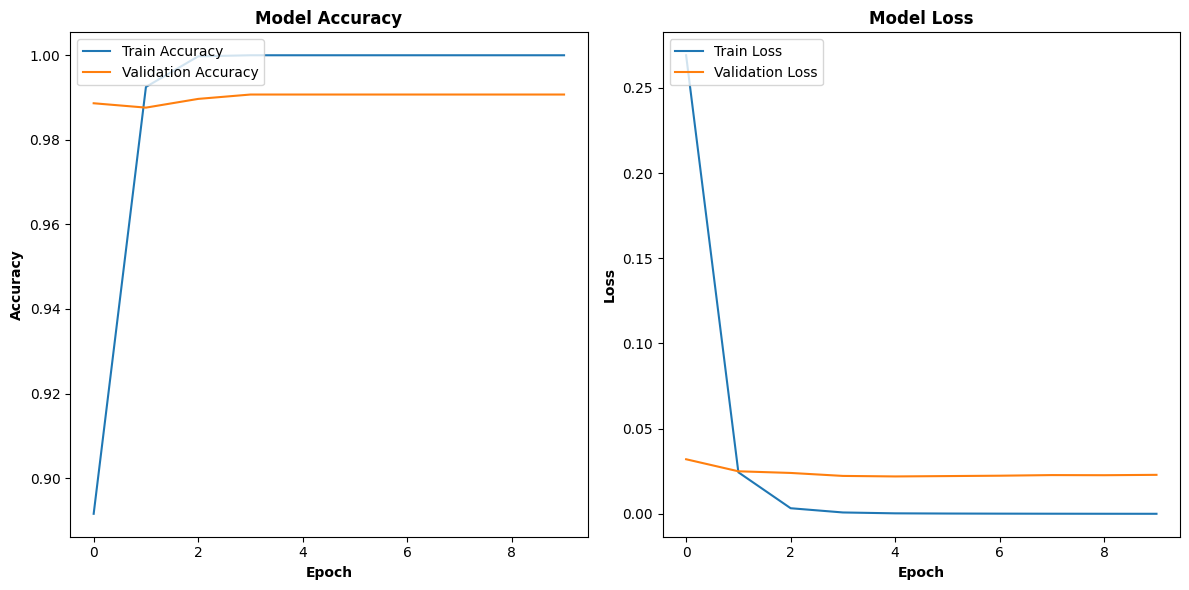

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'history' is the History object returned by the model.fit() method
# Example: history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy',fontweight='bold')
plt.xlabel('Epoch',fontweight='bold')
plt.ylabel('Accuracy',fontweight='bold')
plt.legend(loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss',fontweight='bold')
plt.xlabel('Epoch',fontweight='bold')
plt.ylabel('Loss',fontweight='bold')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()


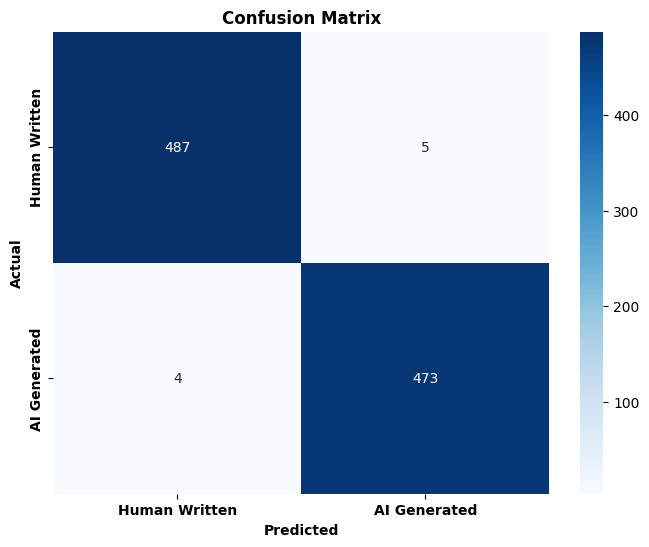

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Plot confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(8, 6))
ax = sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
                 xticklabels=["Human Written", "AI Generated"],
                 yticklabels=["Human Written", "AI Generated"])

# Customize font properties
ax.set_xticklabels(ax.get_xticklabels(), fontweight='bold')
ax.set_yticklabels(ax.get_yticklabels(), fontweight='bold')

plt.title('Confusion Matrix', fontweight='bold')
plt.xlabel('Predicted', fontweight='bold')
plt.ylabel('Actual', fontweight='bold')
plt.show()


In [ ]:
import re
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import load_model

# Define your text cleaning functions
def clean_text(text):
    text = text.lower()
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)  # Remove URLs
    text = re.sub(r'\S*@\S*\s?', '', text)  # Remove Email addresses
    text = re.sub(r'<.*?>', '', text)  # Remove HTML tags
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove special characters and digits
    text = text.translate(str.maketrans('', '', string.punctuation))  # Remove punctuation

    words = word_tokenize(text)  # Tokenization

    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]  # Remove stop words

    stemmer = PorterStemmer()
    words = [stemmer.stem(word) for word in words]  # Stemming

    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]  # Lemmatization

    return ' '.join(words)

# Example unseen data
unseen_data = """
Achieving a work-life balance is essential for overall well-being. It involves managing time effectively to fulfill both professional and personal responsibilities.Effective climate policies are needed to combat global warming. Governments must collaborate to implement regulations that reduce greenhouse gas emissions.Digital transformation is reshaping industries and economies. Embracing new technologies can drive innovation and efficiency.Access to healthcare is a fundamental right. Ensuring that everyone has access to affordable and quality healthcare services is crucial for public health.
"""

cleaned_unseen_data = clean_text(unseen_data)

# Tokenize and pad sequences
max_length = 100  # Assuming the same max length used during training
tokenizer = tokenizer  # Assuming you have loaded the tokenizer used during training
sequences = tokenizer.texts_to_sequences([cleaned_unseen_data])
X_unseen = pad_sequences(sequences, maxlen=max_length)

# Load your trained model
#model = load_model('path_to_your_model.h5')  # Replace with the path to your saved model

# Predict probabilities for the unseen data
predictions = model.predict(X_unseen)

# Assign labels based on the predicted probabilities
threshold = 0.5  # Adjust as needed
predicted_label = 1 if predictions[0] > threshold else 0

# Print the predicted label
print(f'Predicted Label: {predicted_label}')


1/1 [==============================] - 1s 558ms/step
Predicted Label: 1


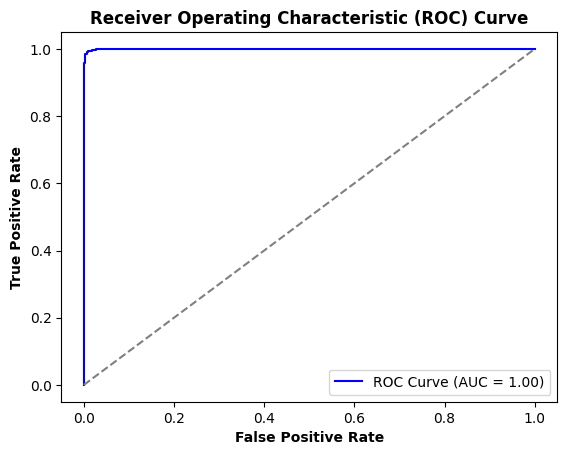

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc_score = roc_auc_score(y_test, y_pred)

plt.figure()
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate',fontweight='bold')
plt.ylabel('True Positive Rate',fontweight='bold')
plt.title('Receiver Operating Characteristic (ROC) Curve',fontweight='bold')
plt.legend(loc="lower right")
plt.show()


# **GridSearch CV**

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.1, 1, 10]}
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5)
start_time = time.time()
grid_search.fit(X_train, y_train)
end_time = time.time()
evaluation_time = end_time - start_time
print(f'Evaluation time: {evaluation_time:.2f} seconds')
print(grid_search.best_params_)



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Evaluation time: 3.20 seconds
{'C': 10}


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.metrics import classification_report
# Train the model



start_time = time.time()
y_pred = grid_search.predict(X_test)
end_time = time.time()
prediction_time = end_time - start_time
print(f'Prediction time: {prediction_time:.2f} seconds')

print(classification_report(y_test, y_pred))

Prediction time: 0.01 seconds
              precision    recall  f1-score   support

           0       0.86      0.63      0.73       492
           1       0.70      0.90      0.79       477

    accuracy                           0.76       969
   macro avg       0.78      0.76      0.76       969
weighted avg       0.78      0.76      0.76       969



# **SVM**

In [ ]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline

# Step 3: SVM Training with specified parameters
svm = SVC(C=10, kernel='rbf', gamma='scale')
start_time = time.time()
svm.fit(X_train, y_train)
end_time = time.time()
evaluation_time = end_time - start_time
print(f'Evaluation time: {evaluation_time:.2f} seconds')
# Evaluation on Test Data
start_time = time.time()
y_pred = svm.predict(X_test)
end_time = time.time()
prediction_time = end_time - start_time
print(f'Prediction time: {prediction_time:.2f} seconds')
print(classification_report(y_test, y_pred))


Evaluation time: 1.79 seconds
Prediction time: 0.79 seconds
              precision    recall  f1-score   support

           0       0.89      0.83      0.86       492
           1       0.83      0.89      0.86       477

    accuracy                           0.86       969
   macro avg       0.86      0.86      0.86       969
weighted avg       0.86      0.86      0.86       969



# **Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import time

# Initialize the Random Forest classifier with specified parameters
rf = RandomForestClassifier(
    n_estimators=100,       # Number of trees in the forest
    max_depth=None,         # Maximum depth of the tree
    min_samples_split=2,    # Minimum number of samples required to split an internal node
    min_samples_leaf=1,     # Minimum number of samples required to be at a leaf node
    max_features='sqrt',    # Number of features to consider when looking for the best split
    bootstrap=True,         # Whether bootstrap samples are used when building trees
    random_state=42         # Random state for reproducibility
)

# Train the classifier
start_time = time.time()
rf.fit(X_train, y_train)
end_time = time.time()
training_time = end_time - start_time
print(f'Training time: {training_time:.2f} seconds')

# Make predictions on the test set
start_time = time.time()
y_pred = rf.predict(X_test)
end_time = time.time()
prediction_time = end_time - start_time
print(f'Prediction time: {prediction_time:.2f} seconds')

# Evaluate the classifier
print(classification_report(y_test, y_pred))


Training time: 4.96 seconds
Prediction time: 0.04 seconds
              precision    recall  f1-score   support

           0       0.91      0.82      0.86       492
           1       0.83      0.91      0.87       477

    accuracy                           0.87       969
   macro avg       0.87      0.87      0.87       969
weighted avg       0.87      0.87      0.87       969



# **Naive bayes**

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

# Initialize the Multinomial Naive Bayes classifier with specified parameters
nb = MultinomialNB(
    alpha=1.0,               # Additive smoothing parameter (Laplace/Lidstone smoothing)
    fit_prior=True,          # Whether to learn class prior probabilities or not
    class_prior=None         # Prior probabilities of the classes (default is None)
)
start_time = time.time()
# Train the classifier
nb.fit(X_train, y_train)
end_time = time.time()
training_time = end_time - start_time
print(f'Training time: {training_time:.2f} seconds')

# Make predictions on the test set
start_time = time.time()
y_pred = nb.predict(X_test)
end_time = time.time()
prediction_time = end_time - start_time
print(f'Prediction time: {prediction_time:.2f} seconds')

# Evaluate the classifier
print(classification_report(y_test, y_pred))


Training time: 0.03 seconds
Prediction time: 0.00 seconds
              precision    recall  f1-score   support

           0       0.92      0.56      0.70       492
           1       0.68      0.95      0.79       477

    accuracy                           0.75       969
   macro avg       0.80      0.75      0.74       969
weighted avg       0.80      0.75      0.74       969



In [ ]:
!pip install transformers

In [ ]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)


X_train shape: (3873, 500)
y_train shape: (3873,)
X_test shape: (969, 500)
y_test shape: (969,)


**LSTM**

In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding, SpatialDropout1D
from tensorflow.keras.preprocessing.sequence import pad_sequences


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, SpatialDropout1D
from tensorflow.keras.optimizers import Adam

# Define parameters
vocab_size = 50257  # Example vocabulary size
maxlen = 500  # Example maximum sequence length
embedding_dim = 32  # Further reduced embedding dimension
lstm_units = 8  # Further reduced number of LSTM units

# Initialize LSTM model
model = Sequential()

# Add Embedding layer
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=maxlen))
model.add(SpatialDropout1D(0.7))  # Further increased dropout rate for regularization

# Add LSTM layer
model.add(LSTM(units=lstm_units, dropout=0.7, recurrent_dropout=0.7))  # Further increased dropout rates

# Add Dense layer (output layer)
model.add(Dense(1, activation='sigmoid'))  # Binary classification

# Compile the model with a lower learning rate
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

# Print model summary
print(model.summary())


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ spatial_dropout1d_1                  │ ?                           │     0 (unbuilt) │
│ (SpatialDropout1D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

None


In [ ]:
# Assuming X_train and y_train are properly prepared sequences and labels
batch_size = 32
epochs = 10

# Train the model
start_time = time.time()
# Train the classifier
history=model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test, y_test))
end_time = time.time()
training_time = end_time - start_time
print(f'Training time: {training_time:.2f} seconds')

# Evaluate the model and generate classification report
# Train the model
start_time = time.time()
# Train the classifier
y_pred = (model.predict(X_test) > 0.5).astype("int32")  # Adjust threshold and type conversion for binary classification
end_time = time.time()
prediction_time = end_time - start_time
print(f'prediction time: {training_time:.2f} seconds')

print(classification_report(y_test, y_pred, target_names=['0', '1']))  # Adjust target names based on your classes


Epoch 1/10
122/122 ━━━━━━━━━━━━━━━━━━━━ 127s 985ms/step - accuracy: 0.4800 - loss: 0.7021 - val_accuracy: 0.5077 - val_loss: 0.6931
Epoch 2/10
122/122 ━━━━━━━━━━━━━━━━━━━━ 153s 1s/step - accuracy: 0.4916 - loss: 0.6973 - val_accuracy: 0.5077 - val_loss: 0.6931
Epoch 3/10
122/122 ━━━━━━━━━━━━━━━━━━━━ 117s 959ms/step - accuracy: 0.4952 - loss: 0.6980 - val_accuracy: 0.5077 - val_loss: 0.6931
Epoch 4/10
122/122 ━━━━━━━━━━━━━━━━━━━━ 142s 961ms/step - accuracy: 0.4899 - loss: 0.6964 - val_accuracy: 0.5077 - val_loss: 0.6931
Epoch 5/10
122/122 ━━━━━━━━━━━━━━━━━━━━ 117s 962ms/step - accuracy: 0.4965 - loss: 0.6974 - val_accuracy: 0.5067 - val_loss: 0.6931
Epoch 6/10
122/122 ━━━━━━━━━━━━━━━━━━━━ 117s 963ms/step - accuracy: 0.5253 - loss: 0.6918 - val_accuracy: 0.5067 - val_loss: 0.6931
Epoch 7/10
122/122 ━━━━━━━━━━━━━━━━━━━━ 146s 1s/step - accuracy: 0.4787 - loss: 0.6981 - val_accuracy: 0.5067 - val_loss: 0.6931
Epoch 8/10
122/122 ━━━━━━━━━━━━━━━━━━━━ 120s 978ms/step - accuracy: 0.5053 - loss:

In [ ]:
# Evaluate the model on test data
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}")


31/31 [==============================] - 5s 162ms/step - loss: 0.6932 - accuracy: 0.4933
Test Accuracy: 0.4933


# **GRU**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Embedding, SpatialDropout1D
from tensorflow.keras.preprocessing.sequence import pad_sequences


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GRU, Dense, SpatialDropout1D
from tensorflow.keras.optimizers import Adam

# Define parameters
vocab_size = 50257  # Example vocabulary size
maxlen = 500  # Example maximum sequence length
embedding_dim = 32  # Further reduced embedding dimension
gru_units = 4  # Further reduced number of GRU units

# Initialize GRU model
model = Sequential()

# Add Embedding layer
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=maxlen))
model.add(SpatialDropout1D(0.5))  # Further increased dropout rate for regularization

# Add GRU layer
model.add(GRU(units=gru_units, dropout=0.5, recurrent_dropout=0.5))  # Further increased dropout rates

# Add Dense layer (output layer)
model.add(Dense(1, activation='sigmoid'))  # Binary classification

# Compile the model with a lower learning rate
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

# Summary of the model
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ spatial_dropout1d_2                  │ ?                           │     0 (unbuilt) │
│ (SpatialDropout1D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru (GRU)                            │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
batch_size = 32
epochs = 10
# Train the model
start_time = time.time()
# Train the classifier
history=model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test, y_test))
end_time = time.time()
training_time = end_time - start_time
print(f'Training time: {training_time:.2f} seconds')

# Evaluate the model and generate classification report
# Train the model
start_time = time.time()
# Train the classifier
y_pred = (model.predict(X_test) > 0.5).astype("int32")  # Adjust threshold and type conversion for binary classification
end_time = time.time()
prediction_time = end_time - start_time
print(f'prediction time: {training_time:.2f} seconds')


# Train the model

# Evaluate the model and generate classification report

print(classification_report(y_test, y_pred, target_names=['0', '1']))  # Adjust target names based on your classes



Epoch 1/10
122/122 ━━━━━━━━━━━━━━━━━━━━ 155s 1s/step - accuracy: 0.4991 - loss: nan - val_accuracy: 0.5077 - val_loss: nan
Epoch 2/10
122/122 ━━━━━━━━━━━━━━━━━━━━ 200s 1s/step - accuracy: 0.4924 - loss: nan - val_accuracy: 0.5077 - val_loss: nan
Epoch 3/10
122/122 ━━━━━━━━━━━━━━━━━━━━ 200s 1s/step - accuracy: 0.4922 - loss: nan - val_accuracy: 0.5077 - val_loss: nan
Epoch 4/10
122/122 ━━━━━━━━━━━━━━━━━━━━ 149s 1s/step - accuracy: 0.5036 - loss: nan - val_accuracy: 0.5077 - val_loss: nan
Epoch 5/10
122/122 ━━━━━━━━━━━━━━━━━━━━ 201s 1s/step - accuracy: 0.5072 - loss: nan - val_accuracy: 0.5077 - val_loss: nan
Epoch 6/10
122/122 ━━━━━━━━━━━━━━━━━━━━ 205s 1s/step - accuracy: 0.5088 - loss: nan - val_accuracy: 0.5077 - val_loss: nan
Epoch 7/10
122/122 ━━━━━━━━━━━━━━━━━━━━ 148s 1s/step - accuracy: 0.4991 - loss: nan - val_accuracy: 0.5077 - val_loss: nan
Epoch 8/10
122/122 ━━━━━━━━━━━━━━━━━━━━ 203s 1s/step - accuracy: 0.5034 - loss: nan - val_accuracy: 0.5077 - val_loss: nan
Epoch 9/10
122/1

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# **CNN**

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout, Flatten
from sklearn.metrics import classification_report
from tensorflow.keras.regularizers import l2


In [ ]:
vocab_size = 50257  # Adjust this based on your vocabulary size
embedding_dim = 128
max_length = 500  # Adjust based on your input length


model = Sequential([
    Embedding(vocab_size, embedding_dim, input_length=max_length),
    Conv1D(16, 5, activation='relu'),  # Further reduced the number of filters
    GlobalMaxPooling1D(),
    Dense(16, activation='relu', kernel_regularizer=l2(0.001)),  # Added L2 regularization
    Dropout(0.7),  # Increased dropout rate
    Dense(1, activation='sigmoid')  # Use 'softmax' for multi-class classification
])

# Compile the model with a lower learning rate
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)  # Reduced learning rate

model.compile(loss='binary_crossentropy',  # Use 'categorical_crossentropy' for multi-class classification
              optimizer=optimizer,
              metrics=['accuracy'])

# Print the model summary
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_4 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_1 (Conv1D)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_max_pooling1d_1               │ ?                           │     0 (unbuilt) │
│ (GlobalMaxPooling1D)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
epochs = 10
batch_size = 32
# Train the model
start_time = time.time()
# Train the classifier
history = model.fit(X_train, y_train,
                    epochs=epochs,
                    validation_data=(X_test, y_test),
                    batch_size=batch_size)
end_time = time.time()
training_time = end_time - start_time
print(f'Training time: {training_time:.2f} seconds')


Epoch 1/10
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8941 - loss: 0.2957 - val_accuracy: 0.9680 - val_loss: 0.1920
Epoch 2/10
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8943 - loss: 0.2929 - val_accuracy: 0.9732 - val_loss: 0.1717
Epoch 3/10
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9083 - loss: 0.2732 - val_accuracy: 0.9742 - val_loss: 0.1519
Epoch 4/10
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9248 - loss: 0.2483 - val_accuracy: 0.9794 - val_loss: 0.1338
Epoch 5/10
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9166 - loss: 0.2424 - val_accuracy: 0.9804 - val_loss: 0.1234
Epoch 6/10
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9308 - loss: 0.2251 - val_accuracy: 0.9835 - val_loss: 0.1123
Epoch 7/10
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9395 - loss: 0.2054 - val_accuracy: 0.9825 - val_loss: 0.1001
Epoch 8/10
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9367 - loss: 0.1969 - val_accuracy: 0.

In [ ]:
# Evaluate the model and generate classification report
# Train the model
start_time = time.time()
y_pred = (model.predict(X_test) > 0.5).astype("int32")  # Adjust threshold and type conversion for binary classification
end_time = time.time()
prediction_time = end_time - start_time
print(classification_report(y_test, y_pred, target_names=['0', '1']))  # Adjust target names based on your classes

31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       492
           1       0.99      0.99      0.99       477

    accuracy                           0.99       969
   macro avg       0.99      0.99      0.99       969
weighted avg       0.99      0.99      0.99       969



# **DL and ML model comparison**

In [ ]:
logistic_regression_accuracy = 0.76
xgboost_accuracy = 0.90
naive_bayes_accuracy = 0.75
svm_accuracy = 0.86
random_forest_accuracy = 0.87
ensemble_accuracy = 0.91
mlp_accuracy = 0.78
lstm_accuracy = 0.49
gru_accuracy = 0.49
CNN=0.95
hybrid_CNN_LSTM_accuracy = 0.99


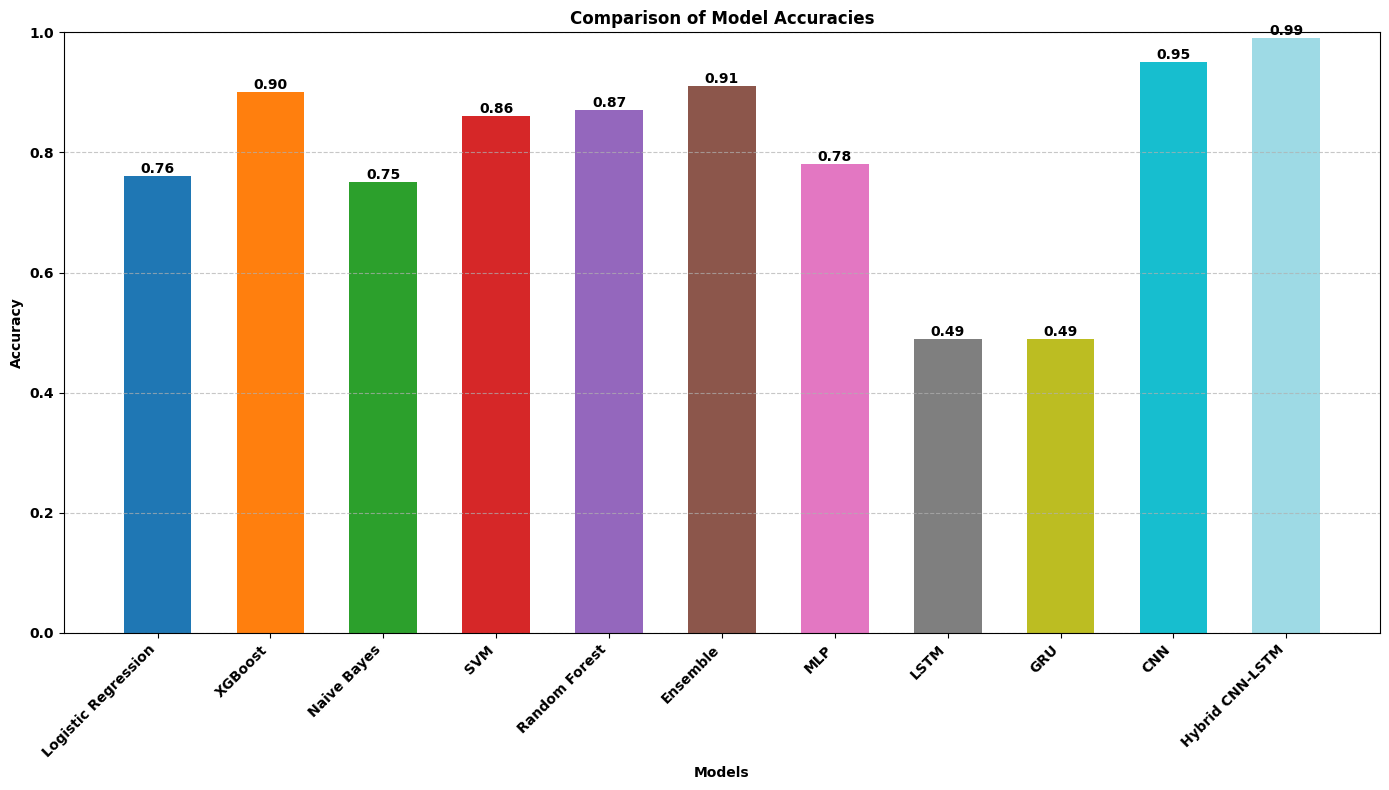

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Accuracies of different models
model_names = [
    'Logistic Regression', 'XGBoost', 'Naive Bayes', 'SVM', 'Random Forest',
    'Ensemble', 'MLP', 'LSTM', 'GRU', 'CNN', 'Hybrid CNN-LSTM'
]
accuracies = [
    logistic_regression_accuracy, xgboost_accuracy, naive_bayes_accuracy,
    svm_accuracy, random_forest_accuracy, ensemble_accuracy, mlp_accuracy,
    lstm_accuracy, gru_accuracy, CNN, hybrid_CNN_LSTM_accuracy,
]

# Generate a list of different colors
colors = plt.cm.tab20(np.linspace(0, 1, len(model_names)))

# Plotting the bar graph
plt.figure(figsize=(14, 8))
bars = plt.bar(model_names, accuracies, color=colors, width=0.6)

# Add bold text to labels and title
plt.xlabel('Models', fontweight='bold')
plt.ylabel('Accuracy', fontweight='bold')
plt.title('Comparison of Model Accuracies', fontweight='bold')
plt.ylim(0, 1)  # Assuming accuracy is between 0 and 1
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Make the x-axis tick labels (model names) bold
plt.xticks(rotation=45, ha='right', fontweight='bold')
plt.yticks(fontweight='bold')
plt.tight_layout()

# Add accuracy labels on top of each bar with bold text
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, f'{yval:.2f}',
             va='bottom', ha='center', fontweight='bold')  # Bold text

plt.show()
